In [111]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import pandas as pd
import os
from numpy import *

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 16 #32
plt.rcParams['xtick.labelsize'] = 16 #24
plt.rcParams['ytick.labelsize'] = 16 #24
plt.rcParams['legend.fontsize'] = 16 #32
plt.rcParams['text.usetex'] = True

In [3]:
from sklearn.svm import SVC
from sklearn import datasets

# filename = '/Users/roberto/data/RO-logging/2019-02-06-11-52-52/tmp_combined_data.csv';
# filename = '/Users/roberto/data/RO-logging/datasets/ro-eigenvecs/maxEVecs-ro-dataset.csv';
dateAndTime = "2019-03-18-15-00-42/";
filename = "/Users/roberto/data/odometry-comparisons/rugged_ro/"\
"2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/standard-ro/"+dateAndTime+'tmp_combined_data.csv';

print('Reading from: ' + filename)
df_combined_data = pd.read_csv(filename, names=range(2400))
df_maxEVecs = df_combined_data.iloc[:,1:] #pd.read_csv(filename, names=range(2400))

df_labels = df_combined_data.iloc[:,0:1]
labels = np.copy(df_labels.values)
labels = labels.T

[m,n] = shape(df_maxEVecs)

print("Shape of max eigenvecs is:\n",shape(df_maxEVecs))
print("Shape of labels is:\n",shape(df_labels))
print("Shape of data is:\n",shape(df_combined_data))

Reading from: /Users/roberto/data/odometry-comparisons/rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/motion_estimation/standard-ro/2019-03-18-15-00-42/tmp_combined_data.csv
Shape of max eigenvecs is:
 (5955, 2399)
Shape of labels is:
 (5955, 1)
Shape of data is:
 (5955, 2400)


1265


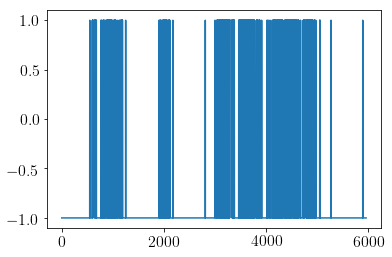

In [4]:
df_labels.head()
plt.plot(df_labels)
print(np.count_nonzero(df_labels+1))

In [5]:
# where_are_NaNs = isnan(df_maxEVecs)
# df_maxEVecs[where_are_NaNs] = 0.0
df_maxEVecs.head()

,1,2,3,4,5,6,7,8,9,10,...,2390,2391,2392,2393,2394,2395,2396,2397,2398,2399
0,0.026703,0.026701,0.026697,0.026691,0.026687,0.026681,0.026679,0.026677,0.026674,0.026669,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.026910,0.026902,0.026901,0.026898,0.026897,0.026897,0.026896,0.026896,0.026894,0.026894,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.026918,0.026916,0.026915,0.026907,0.026903,0.026897,0.026897,0.026892,0.026891,0.026878,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.026909,0.026903,0.026895,0.026891,0.026891,0.026887,0.026882,0.026847,0.026847,0.026846,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.026921,0.026920,0.026919,0.026918,0.026880,0.026876,0.026875,0.026872,0.026871,0.026855,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [372]:
# Handcrafted features for all data (train and test data)
eigenvectors = np.copy(df_maxEVecs.values)
max_vals = []
max_vals = eigenvectors[:,0]
num_landmarks = count_nonzero(eigenvectors,axis=1)
area_under_curve = []

for i in range(m): 
    temp_sum = 0;
    for j in range(n):
        temp_sum += eigenvectors[i,j]
    area_under_curve.append(temp_sum)
    
previous_max_vals = [max_vals[0]]
previous_max_vals = np.append(previous_max_vals,max_vals[0:m-1])
previous_num_landmarks = [num_landmarks[0]]
previous_num_landmarks = np.append(previous_num_landmarks,num_landmarks[0:m-1])
previous_area_under_curve = [area_under_curve[0]]
previous_area_under_curve = np.append(previous_area_under_curve,area_under_curve[0:m-1])

In [373]:
tmp_max_vals = list(max_vals)
tmp_previous_max_vals = list(previous_max_vals)
tmp_num_landmarks = list(num_landmarks)
tmp_previous_num_landmarks = list(previous_num_landmarks)
tmp_area_under_curve = list(area_under_curve)
tmp_previous_area_under_curve = list(previous_area_under_curve)

max_vals = np.array(tmp_max_vals + tmp_previous_max_vals)
previous_max_vals = np.array(tmp_previous_max_vals + tmp_max_vals)
num_landmarks = np.array(tmp_num_landmarks + tmp_previous_num_landmarks)
previous_num_landmarks = np.array(tmp_previous_num_landmarks + tmp_num_landmarks)
area_under_curve = np.array(tmp_area_under_curve + tmp_previous_area_under_curve)
previous_area_under_curve = np.array(tmp_previous_area_under_curve + tmp_area_under_curve)

print(len(max_vals))
print(len(tmp_max_vals))

import random
random_noise = random.sample(range(1,100000),len(max_vals))

temp_dict = {'max_vals':max_vals,
             'num_landmarks':num_landmarks,
            'area_under_curve':area_under_curve,
            'previous_max_vals':previous_max_vals,
            'previous_num_landmarks':previous_num_landmarks,
            'previous_area_under_curve':previous_area_under_curve}
#             'random_noise':random_noise}

df_features = pd.DataFrame(data = temp_dict)
df_features.head()

11910
5955


,max_vals,num_landmarks,area_under_curve,previous_max_vals,previous_num_landmarks,previous_area_under_curve
0,0.026703,1614,39.880415,0.026703,1614,39.880415
1,0.026910,1604,39.792908,0.026703,1614,39.880415
2,0.026918,1604,39.727950,0.026910,1604,39.792908
3,0.026909,1614,39.871966,0.026918,1604,39.727950
4,0.026921,1612,39.847845,0.026909,1614,39.871966


In [374]:
maxEVecs = list(df_maxEVecs.values)
maxEVecs = np.array(maxEVecs + maxEVecs)
y_labels = list(ravel(labels))
y_labels = np.array(y_labels + y_labels)
len(y_labels)
maxEVecs[1]
train_index

array([ 272, 5187, 6450, ..., 5873, 3905,   27])

In [375]:
print(num_landmarks[0])
print(np.count_nonzero(eigenvectors[0,0:1800],axis=0))

1614
1614


In [376]:
from sklearn.model_selection import StratifiedShuffleSplit

print('Good RO: ',np.count_nonzero(labels==-1))
print('Bad RO:',np.count_nonzero(labels==1),'\n')

X_total = np.copy(df_features.values)
y_total = np.copy(y_labels)

sss = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=0)

for train_index, test_index in sss.split(X_total, y_total):
    X_train, X_test = X_total[train_index], X_total[test_index]
    y_train, y_test = y_total[train_index], y_total[test_index]
    eig_train, eig_test = maxEVecs[train_index], maxEVecs[test_index]

print('Good vs Bad RO in training: ',np.count_nonzero(y_train==-1),'good,',np.count_nonzero(y_train==1),'bad')
print('Good vs Bad RO in testing:',np.count_nonzero(y_test==-1),'good,',np.count_nonzero(y_test==1),'bad \n')

print('Good/Bad ratio in training: ',np.count_nonzero(y_train==-1)/np.count_nonzero(y_train==1))
print('Good/Bad ratio in testing:',np.count_nonzero(y_test==-1)/np.count_nonzero(y_test==1),'\n')

# print('Bad RO % in training: ',np.count_nonzero(y_train==1)/np.count_nonzero(labels==1))
# print('Bad RO % in testing:',np.count_nonzero(y_test==1)/np.count_nonzero(labels==1),'\n')

print('Bad RO % in training: ',np.count_nonzero(y_train==1)/len(y_train))
print('Bad RO % in testing:',np.count_nonzero(y_test==1)/len(y_test),'\n')

[m_train,n_train] = shape(X_train)
[m_test,n_test] = shape(X_test)
print("Size of training data is: \n",shape(X_train))
print("Size of test data is: \n",shape(X_test))

Good RO:  4690
Bad RO: 1265 

Good vs Bad RO in training:  7504 good, 2024 bad
Good vs Bad RO in testing: 1876 good, 506 bad 

Good/Bad ratio in training:  3.707509881422925
Good/Bad ratio in testing: 3.707509881422925 

Bad RO % in training:  0.21242653232577666
Bad RO % in testing: 0.21242653232577666 

Size of training data is: 
 (9528, 6)
Size of test data is: 
 (2382, 6)


In [377]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X_train)
# scaler = preprocessing.MaxAbsScaler().fit(X_train)
X_scaled = preprocessing.scale(X_train)
print("Mean: ",X_scaled.mean(axis=0))
print("Variance: ",X_scaled.std(axis=0))

Mean:  [ 2.61045966e-14  5.39147978e-17 -8.83423151e-15  4.49059346e-14
  1.07468377e-16 -4.95724368e-14]
Variance:  [1. 1. 1. 1. 1. 1.]


[ 1.30920549  0.12015942  2.08665869 ...  1.10868589 -0.86133126
  0.69005724]
0.9999999999999983


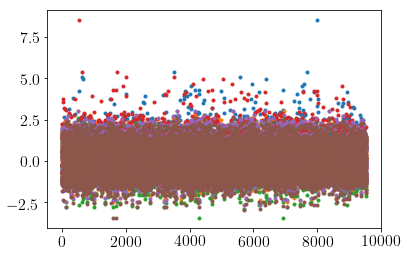

In [378]:
print(X_scaled[:,1])
print(var(X_scaled[:,1]))
plt.plot(X_scaled,'.');

In [379]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

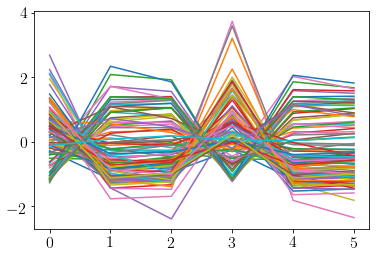

In [380]:
plt.plot(X_train[0:100,:].T,'-');

In [381]:
plot_fig = False
if(plot_fig == True):
    label_colours = []   
    test_colours = []
    for i in range(m_train):
        if(y_train[i] == 1):
            label_colours.append('red')
        else:
            label_colours.append('blue')
    for i in range(m_test):
        if(y_test[i] == 1):
            test_colours.append('red')
        else:
            test_colours.append('blue')

    plt.figure(figsize=(20,10))
    for i in range(300,600):
        plt.plot(X_train[i,:].T,color=label_colours[i],markersize=0.1);
        plt.plot(eig_train[i,:].T, color=label_colours[i],markersize=0.1);
        plt.title("Normalised eigenvector element magnitudes classified by odometry estimate",fontsize=32,y=1.03)

    line1, = plt.plot([],[],color='blue',label='Success')
    line2, = plt.plot([],[],color='red',label='Failure')
    plt.legend(handles=[line1,line2],fontsize=24)
    plt.xlabel('Element index',labelpad=10)
    plt.ylabel('Element magnitude',labelpad=10)

    # for i in range(m_train):
    #     plt.subplot(121)
    #     plt.plot(eig_train[i,:].T, color=label_colours[i]);
    #     plt.title("Training data", fontsize=16)

    # for i in range(m_test):
    #     plt.subplot(122)
    #     plt.plot(eig_test[i,:].T, color=test_colours[i]);
    #     plt.title("Test data", fontsize=16)
    plt.savefig("/Users/roberto/data/fig1.pdf",bbox_inches='tight',pad_inches = 0)

In [384]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

# SVM Classifier model
# svm_clf = SVC(kernel="rbf",class_weight='balanced', C=float(100000))
# clf = SVC(kernel="rbf",class_weight='balanced', C=float(20),gamma=0.1,random_state=0)
clf = SVC(kernel="linear",class_weight='balanced', C=float(20),gamma=0.001,random_state=0)

print(clf.fit(X_train, y_train))
y_predictions = clf.predict(X_test)

print('Accuracy:',clf.score(X_test,y_test))
print('F1 score:',f1_score(y_predictions,y_test))
# Random Forest
# clf = RandomForestClassifier(n_estimators=10)
# clf = clf.fit(X_train,y_train)

# plt.plot(clf.coef_.T,'*--')

SVC(C=20.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)
Accuracy: 0.792191435768262
F1 score: 0.6506704304869443


In [ ]:
from sklearn.model_selection import GridSearchCV
doGridSearch = False
if(doGridSearch == True):
    # parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10, 20, 40],'gamma':[0.0001,0.001,0.01,0.1]}
    parameters = {'kernel':['linear'], 'C':[1,10,20,30,40],'gamma':[0.0001,0.001,0.01,0.1]}

    svc = svm.SVC()
    clf_GS = GridSearchCV(svc, parameters, cv=5,scoring=make_scorer(f1_score),n_jobs=-1,verbose=0)
    clf_GS.fit(X_train,y_train)
    cv_results = clf_GS.cv_results_
    scores_df = pd.DataFrame(cv_results).sort_values(by='rank_test_score')

In [330]:
scores_df.to_csv('/Users/roberto/data/gridSearch.csv')


In [332]:
from sklearn.feature_selection import RFE
clf_tmp = SVC(kernel="linear",class_weight='balanced', C=float(20),gamma=0.001,random_state=0)
selector = RFE(clf_tmp,1,step=1,verbose=1)
selector = selector.fit(X_train,y_train)
print(selector.ranking_)
# plt.figure(figsize=(30,8))
# plt.plot(selector.predict(X_train),'.',markersize=0.5)

Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
[3 2 1 6 4 5]


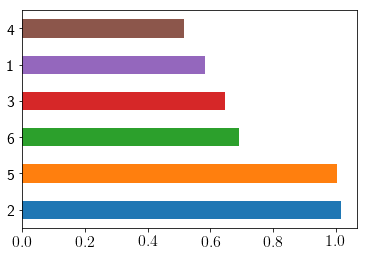

In [362]:
from sklearn import svm
# imp = svm.coef_
# imp,features_names = zip(*sorted(zip(imp,features_names)))
# print("range(len(feature_names)):",range(len(features_names)))
# print("imp:",imp)
# # print('coef:',svm.coef_)
# print("feature_names:",features_names)
# print([0,1,2])
# plt.barh([0,1,2,3,4,5],imp[0],align='center')
# features_names = ['max vals', 'num landmarks','area under curve',
# 'previous max vals','previous num landmarks','previous area under curve']
# features_names = ['1', '2','3','4','5','6','7']
features_names = ['1', '2','3','4','5','6']

clf_tmp = SVC(kernel="linear",class_weight='balanced', C=float(1),random_state=0)
clf_tmp.fit(X_train, y_train)
pd.Series(abs(clf_tmp.coef_[0]), index=features_names).nlargest(6).plot(kind='barh')
# pd.Series(abs(svm.coef_[0])).nlargest(6).plot(kind='barh')


In [217]:
# from sklearn import svm
# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp[0], align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['maxvals', 'numlandmarks','areaundercurve',
# 'previousmaxvals','previousnumlandmarks','previousareaundercurve']
# # features_names = ['a', 'b','c','d','e','f']
# svm = svm.SVC(kernel='linear')
# svm.fit(X_train, y_train)
# f_importances(svm.coef_, features_names)

In [333]:
print('Testing on X data with shape: ',shape(X_test))
predictions = clf.predict(X_test)
successes = 0
for i in range(len(predictions)):
    if predictions[i] == y_test[i]:
        successes+=1   
print('Successes: ',successes,' out of ',len(y_test))
print('Classification accuracy = ',successes/len(y_test))

Testing on X data with shape:  (2382, 6)
Successes:  1887  out of  2382
Classification accuracy =  0.792191435768262


/Users/roberto/code/virtual-environments/ml-env-0/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


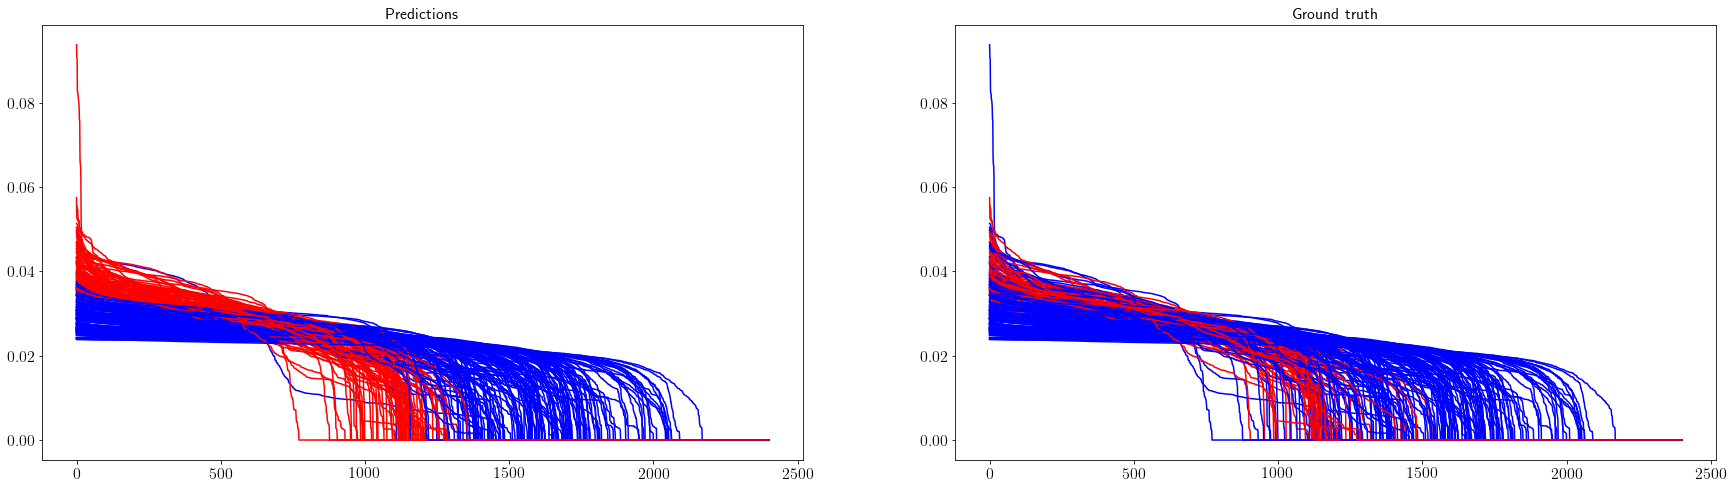

In [311]:
predict_colours = []
correct_colours = []
for i in range(m_test):
    if(predictions[i] == 1):
        predict_colours.append('red')
    else:
        predict_colours.append('blue')
for i in range(m_test):
    if(y_test[i] == 1):
        correct_colours.append('red')
    else:
        correct_colours.append('blue')

plt.figure(figsize=(30,8))
for i in range(m_test):
    if(i%10 ==0):
        plt.subplot(121)
        plt.plot(eig_test[i,:].T, color=predict_colours[i]);
        plt.title("Predictions", fontsize=16)

        plt.subplot(122)
        plt.plot(eig_test[i,:].T, color=correct_colours[i]);
        plt.title("Ground truth", fontsize=16)

In [363]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score
from sklearn.metrics.scorer import make_scorer

scoring = ['precision_macro', 'recall_macro']

scores = cross_validate(clf,X_train,y_train, scoring=make_scorer(f1_score),cv=5,return_train_score=True)
scores

{'fit_time': array([1.8387897 , 1.7404449 , 1.70725179, 1.66115499, 1.72922516]),
 'score_time': array([0.11557603, 0.11873817, 0.11441016, 0.10957313, 0.11378407]),
 'test_score': array([0.63871543, 0.63966245, 0.62691652, 0.62956522, 0.62425785]),
 'train_score': array([0.63211991, 0.62973262, 0.63472282, 0.63887689, 0.63471503])}

In [364]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(clf,X_train, y_train, cv=5)

In [365]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train,y_train_pred)

array([[5554, 1950],
       [ 189, 1835]])

In [366]:
from sklearn.metrics import precision_score, recall_score
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred),'\n')

from sklearn.metrics import f1_score
print('F1 score: \n',f1_score(y_train,y_train_pred))

Precision (% when positive prediction is correct):
 0.4848084544253633 

Recall (% of bad RO instances detected):
 0.9066205533596838 

F1 score: 
 0.6317782750903771


In [367]:
from sklearn.model_selection import cross_val_score
y_scores = cross_val_predict(clf, X_train, y_train, cv=5,
                                 method="decision_function")
# y_scores = cross_val_predict(clf, X_train, y_train, cv=3)

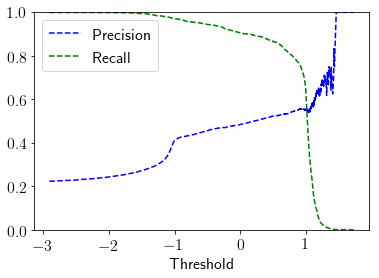

In [368]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(y_train, y_scores)

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="Recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

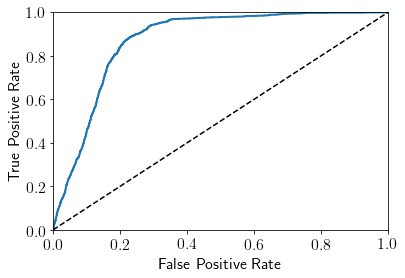

Area under ROC curve 0.8708397023563716


In [369]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr, tpr, thresholds = roc_curve(y_train, y_scores)

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr, tpr)
plt.show()

print('Area under ROC curve',roc_auc_score(y_train, y_scores))

In [370]:
# Need to set all bad RO labels from -1 to 0 for this function to work
indices = [i for i, x in enumerate(y_train) if x == -1]
y_train[indices] = 0

y_train_pred_thresholding = (y_scores > -1)
# print(y_train.shape)
# print(y_train)
print('Precision (% when positive prediction is correct):\n',precision_score(y_train,y_train_pred_thresholding),'\n')
print('Recall (% of bad RO instances detected):\n',recall_score(y_train, y_train_pred_thresholding),'\n')

Precision (% when positive prediction is correct):
 0.41002087682672234 

Recall (% of bad RO instances detected):
 0.9703557312252964 



In [342]:
import sys
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts")
sys.path.append("/Users/roberto/code/robust-me-scripts/scripts/config")
sys.path.append("/Users/roberto/code/corelibs/src/tools-python")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes")
sys.path.append("/Users/roberto/code/corelibs/build/datatypes/datatypes_python")
import module

from mrg.logging import IndexedMonolithic #MonolithicDecoder
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python")
# sys.path.append("/Users/roberto/code/radar-utilities/build/radarutilities_datatypes_python/protobuf/")

# for p in sys.path:
#     print(p)

from protobuf.classification_score import pbClassificationScore_pb2
classification_file = "/Users/roberto/data/odometry-comparisons/"\
"rugged_ro/2018-06-21-15-58-58-rural-loop-v4-radar-leopon-trial-sunny-long-range/"\
"motion_estimation/ground-truth/labels.monolithic"

mono_decoder = IndexedMonolithic(classification_file) #MonolithicDecoder(classification_file)
classification_scores = []
classification_timestamps = []

for pb, _, _ in mono_decoder:
    timestamp = pb.timestamp
    classification_score = pb.score
    classification_scores.append(classification_score)
    classification_timestamps.append(timestamp)
print("Finished importing ground truth labels.")
print("Size of imported labels is:",len(classification_scores))

# classification_scores, timestamps  = map(list, zip(*[pb.score, pb.timestamp for pb, _, _ in mono_decoder]))
# classification_timestamps = [pb.timestamp for pb, _, _ in mono_decoder]

importing  protobuf.logging.pbMonolithicIndexArray_pb2
importing  protobuf.classification_score.pbClassificationScore_pb2
Finished importing ground truth labels.
Size of imported labels is: 5955


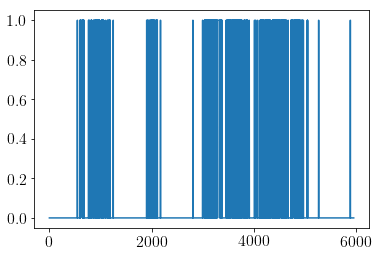

In [343]:
import matplotlib.pyplot as plt
plt.plot(classification_scores)
plt.show()

In [344]:
X_experiment = np.copy(df_features.values)
X_experiment = preprocessing.scale(X_experiment)
predictions = clf.predict(X_experiment)
for i in range(len(predictions)):
    if predictions[i] == -1:
        predictions[i] = 0

Ground truth failures:  1265
Predicted failures:  4674
True positives:  1146
False positives:  1192
True negatives:  3498
False negatives:  119
True positives:  1146
Confusion matrix:
 3498   1192 
 119   3498
Precision: 0.49016253207869975
Recall: 0.9059288537549407


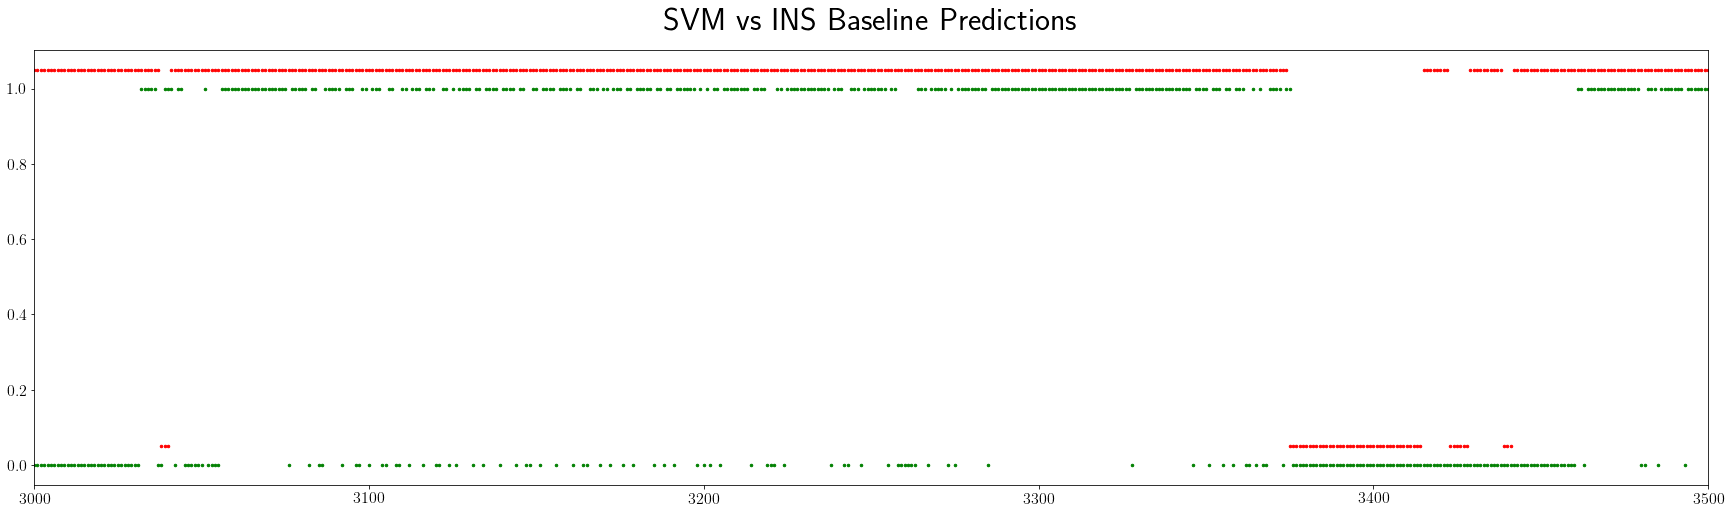

In [345]:
plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,3500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)


TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(classification_scores[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(classification_scores[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(classification_scores))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)

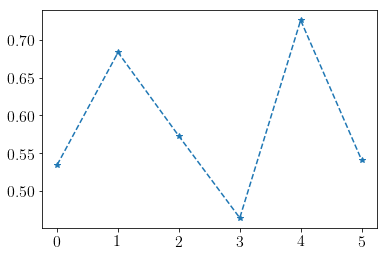

In [349]:
from matplotlib import pyplot as plt
from sklearn import svm
# def f_importances(coef, names):
#     imp = coef
#     imp,names = zip(*sorted(zip(imp,names)))
#     plt.barh(range(len(names)), imp, align='center')
#     plt.yticks(range(len(names)), names)
#     plt.show()

# features_names = ['input1', 'input2']
svm = svm.SVC(kernel='linear')
svm.fit(X_train, y_train)
plt.plot(abs(svm.coef_).T,'*--')
# f_importances(svm.coef_, features_names)

Ground truth failures:  1391
Predicted failures:  4674
True positives:  1284
False positives:  1054
True negatives:  3510
False negatives:  107
True positives:  1284
Confusion matrix:
 3510   1054 
 107   3510
Precision: 0.5491873396065012
Recall: 0.9230769230769231
F1 score: 0.6886564762670957


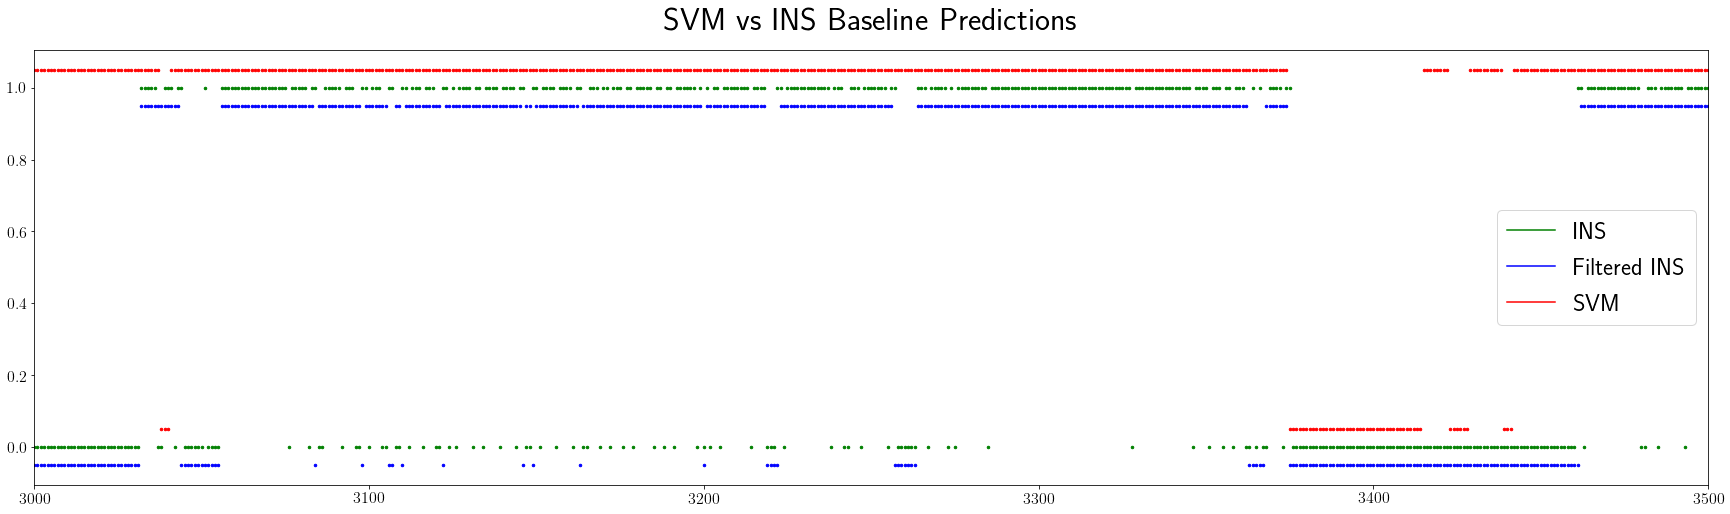

In [348]:
import scipy.signal
tmp_gt = np.array(classification_scores)
tmp_gt = scipy.signal.medfilt(tmp_gt,5)

plt.figure(figsize=(30,8))
plt.plot(classification_scores,'g.',markersize=5)
plt.plot([x-0.05 for x in tmp_gt],'b.',markersize=5)
plt.plot([x+0.05 for x in predictions],'r.',markersize=5)
plt.xlim(3000,3500)
plt.title("SVM vs INS Baseline Predictions",fontsize=32,y=1.03)
line1, = plt.plot([],[],color='green',label='INS')
line2, = plt.plot([],[],color='blue',label='Filtered INS')
line3, = plt.plot([],[],color='red',label='SVM')
plt.legend(handles=[line1,line2,line3],fontsize=24,loc='right')
TP = 0
FP = 0
TN = 0
FN = 0
for i in range(len(classification_scores)):
    if(tmp_gt[i] == 1 and predictions[i] == 1):
        TP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 1):
        FP += 1
    elif(tmp_gt[i] == 0 and predictions[i] == 0):
        TN += 1
    else:
        FN += 1
print("Ground truth failures: ", count_nonzero(tmp_gt))
print("Predicted failures: ", count_nonzero(predictions))
print("True positives: ", TP)
print("False positives: ", FP)
print("True negatives: ", TN)
print("False negatives: ", FN)
print("True positives: ", TP)
print("Confusion matrix:\n", TN," ",FP,"\n",FN," ",TN)
precision = TP/(TP+FP)
recall = TP/(TP+FN)
print("Precision:",precision)
print("Recall:",recall)
print("F1 score:",2*(precision*recall)/(precision+recall))